# ***Model Traning And Pipeline Creation***

#### **Importing Library**

In [1]:
import pandas as pd
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from gensim.models import Word2Vec
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
import joblib

from sklearn import set_config
set_config(display='diagram')


In [2]:
# Ensure NLTK downloads are available
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ujjwa_n18433z\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ujjwa_n18433z\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ujjwa_n18433z\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### **Load DataSet**

In [3]:
ds = pd.read_csv("C:\\Users\\ujjwa_n18433z\\Desktop\\ujjwal\\All Projects\\Project_WoC_7.0_Fake_Review_Detection\\fakeReviewData.csv")


#### **Text Preprocessor Class**


In [4]:
class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.stopwords = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Apply all preprocessing steps to each text entry
        return X.apply(self._preprocess_text)
    
    def _preprocess_text(self, text):
        # Remove digits and lowercase
        text = "".join([char.lower() for char in text if not char.isdigit()])
        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Tokenize and remove stopwords
        words = [word for word in word_tokenize(text) if word not in self.stopwords]
        # Lemmatize words
        words = [self.lemmatizer.lemmatize(word) for word in words]
        # Rejoin words into a single string
        return " ".join(words)

#### **Encoding Labels**

In [5]:
target_encoder = LabelEncoder()
ds['label'] = target_encoder.fit_transform(ds['label'])  # Encode target (e.g., 'low' -> 0, 'high' -> 1)


#### **Creating a Column Transformation**

In [6]:
preprocessor = ColumnTransformer(
    transformers=[
        ('text', Pipeline([
            ('preprocessor', TextPreprocessor()),
            ('tfidf', TfidfVectorizer(max_features=500))
        ]), 'text_'),
        ('category', OneHotEncoder(handle_unknown='ignore'), ['category']),
        ('rating', StandardScaler(), ['rating'])  # Wrap 'rating' in a list to make it 2D
    ],
    remainder='passthrough'
)

#### **Split the data into training and testing sets**

In [7]:
# Split the data into training and testing sets
X = ds.drop(columns=['label']) 
y = ds['label'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


#### **Define Full Pipeline**

In [8]:
pipelinelg = Pipeline([
    ('preprocessor', preprocessor),                    
    ('classifier', LogisticRegression(random_state=42))  # Logistic Regression
])

In [9]:
pipelinelg

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('text',
                                                  Pipeline(steps=[('preprocessor',
                                                                   TextPreprocessor()),
                                                                  ('tfidf',
                                                                   TfidfVectorizer(max_features=500))]),
                                                  'text_'),
                                                 ('category',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['category']),
                                                 ('rating', StandardScaler(),
                                                  ['rating'])])),
                ('classifier', LogisticRegression(random_state=42))])

#### **Train, predict and evaluate Logistic Regression**

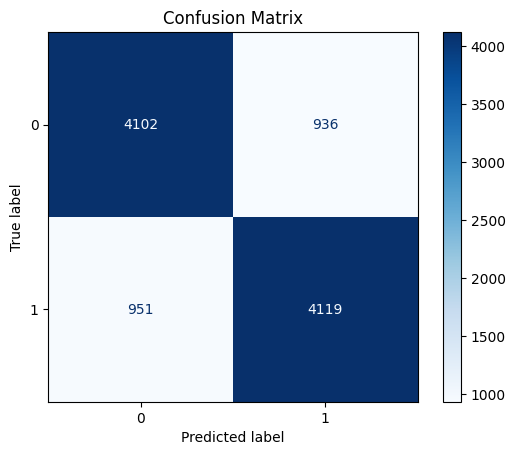

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      5038
           1       0.81      0.81      0.81      5070

    accuracy                           0.81     10108
   macro avg       0.81      0.81      0.81     10108
weighted avg       0.81      0.81      0.81     10108



In [10]:
# Train the pipeline
pipelinelg.fit(X_train, y_train)

# Generate predictions
y_pred = pipelinelg.predict(X_test)

# Create Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipelinelg.named_steps['classifier'].classes_)

# Plot the Confusion Matrix
cmd.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


#### **Define Support Vector Classifier Pipeline**

In [11]:


pipelinesvm = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42))
])

#### **Train, predict and evaluate SVM**

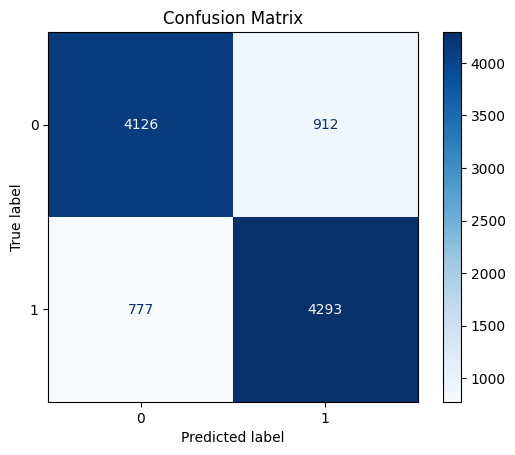

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      5038
           1       0.82      0.85      0.84      5070

    accuracy                           0.83     10108
   macro avg       0.83      0.83      0.83     10108
weighted avg       0.83      0.83      0.83     10108



In [12]:
# Train the pipeline
pipelinesvm.fit(X_train, y_train)

# Generate predictions
y_pred = pipelinesvm.predict(X_test)

# Create Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipelinesvm.named_steps['classifier'].classes_)

# Plot the Confusion Matrix
cmd.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

#### **Define Random Forest Classifier Pipeline**

In [13]:

pipelinerf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [14]:
pipelinerf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('text',
                                                  Pipeline(steps=[('preprocessor',
                                                                   TextPreprocessor()),
                                                                  ('tfidf',
                                                                   TfidfVectorizer(max_features=500))]),
                                                  'text_'),
                                                 ('category',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['category']),
                                                 ('rating', StandardScaler(),
                                                  ['rating'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

#### **Train, predict and evaluate Random Forest**

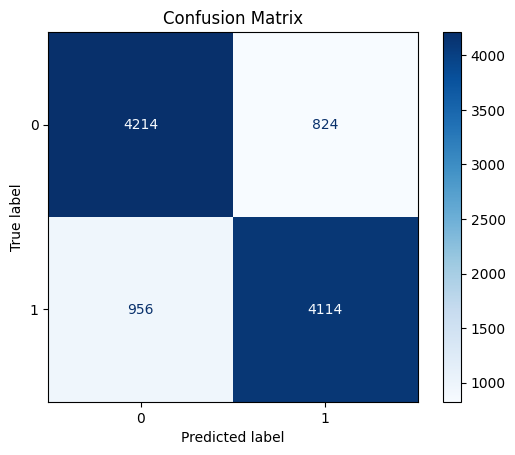

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      5038
           1       0.83      0.81      0.82      5070

    accuracy                           0.82     10108
   macro avg       0.82      0.82      0.82     10108
weighted avg       0.82      0.82      0.82     10108



In [15]:
pipelinerf.fit(X_train, y_train)
 
# Generate predictions
y_pred = pipelinerf.predict(X_test)

# Create Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipelinerf.named_steps['classifier'].classes_)

# Plot the Confusion Matrix
cmd.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

#### **Define Multi Layer Perceptron Classifier Pipeline**

In [16]:

pipelinemlp = Pipeline([
    ('preprocessor', preprocessor),  
    ('classifier', MLPClassifier(
        hidden_layer_sizes=(100, 50),
        activation='relu',           
        solver='adam',               
        max_iter=200,                
        random_state=42,
        early_stopping=True,         
        validation_fraction=0.1      
    ))
])

In [17]:
pipelinemlp

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('text',
                                                  Pipeline(steps=[('preprocessor',
                                                                   TextPreprocessor()),
                                                                  ('tfidf',
                                                                   TfidfVectorizer(max_features=500))]),
                                                  'text_'),
                                                 ('category',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['category']),
                                                 ('rating', StandardScaler(),
                                                  ['rating'])])),
                ('classifier',
                 MLPClassifier(early_stopping=True,
                               hidden_layer_sizes=(100, 50),
                               random_state=42))])

#### **Train, predict and evaluate MLP**

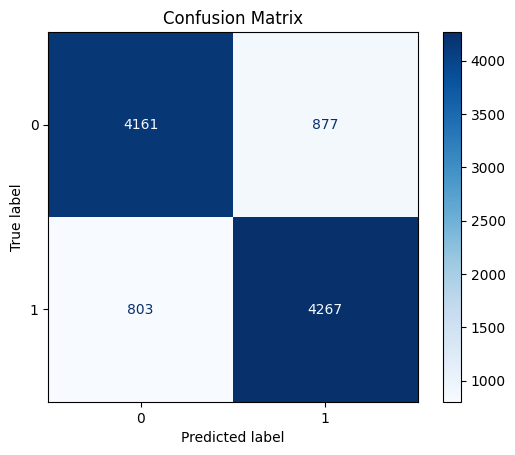

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      5038
           1       0.83      0.84      0.84      5070

    accuracy                           0.83     10108
   macro avg       0.83      0.83      0.83     10108
weighted avg       0.83      0.83      0.83     10108



In [18]:
# Train the pipeline
pipelinemlp.fit(X_train, y_train)
 
# Generate predictions
y_pred = pipelinemlp.predict(X_test)

# Create Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipelinemlp.named_steps['classifier'].classes_)

# Plot the Confusion Matrix
cmd.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

## Using Emmbeddings 

#### **Word2Vec Model Preparation**

In [19]:


class Word2VecTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, model=None, vector_size=100):
        self.model = model
        self.vector_size = vector_size
    
    def fit(self, X, y=None):
        if self.model is None:
            sentences = [text.split() for text in X]
            self.model = Word2Vec(sentences, vector_size=self.vector_size, window=5, min_count=1, workers=4)
        return self
    
    def transform(self, X):
        vectors = []
        for text in X:
            words = text.split()
            word_vectors = [self.model.wv[word] for word in words if word in self.model.wv]
            if word_vectors:
                vectors.append(np.mean(word_vectors, axis=0))
            else:
                vectors.append(np.zeros(self.vector_size))  # Return a zero vector if no words are found
        return np.array(vectors, dtype=np.float32)  # Ensure output is of type float32





#### **Define Column Transformer with Word2Vec**

In [20]:
preprocessor = ColumnTransformer(
    transformers=[
        ('text', Pipeline([
            ('word2vec', Word2VecTransformer(vector_size=100))
        ]), 'text_'),
        ('category', OneHotEncoder(handle_unknown='ignore'), ['category']),
        ('rating', StandardScaler(), ['rating'])  
    ],
    remainder='passthrough'
)


#### **Define MLP Pipeline with Word2Vec Preprocessing**

In [21]:

pipelinemlp = Pipeline([
    ('preprocessor', preprocessor),  # Your ColumnTransformer
    ('classifier', MLPClassifier(
        hidden_layer_sizes=(100,50),  # Example: 2 hidden layers, 100 and 50 neurons
        activation='relu',              # ReLU activation
        solver='adam',                 # Adam optimizer
        max_iter=200,                  # Increase if needed for convergence
        random_state=42,
        early_stopping=True,          # Use early stopping to prevent overfitting
        validation_fraction=0.1       # Proportion of training data for validation
    ))
])

In [22]:
pipelinemlp


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('text',
                                                  Pipeline(steps=[('word2vec',
                                                                   Word2VecTransformer())]),
                                                  'text_'),
                                                 ('category',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['category']),
                                                 ('rating', StandardScaler(),
                                                  ['rating'])])),
                ('classifier',
                 MLPClassifier(early_stopping=True,
                               hidden_layer_sizes=(100, 50),
                               random_state=42))])

#### **Train, predict and evaluate MLP with Word2Vec**

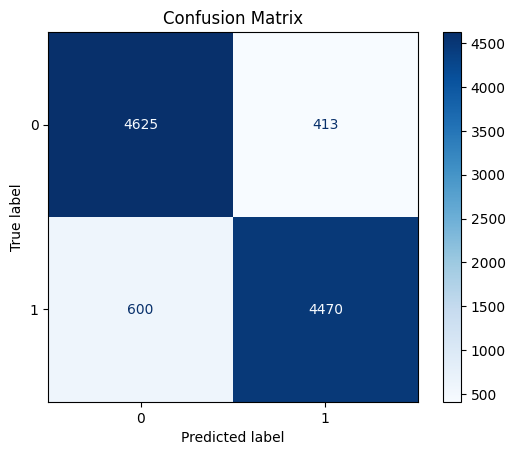

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      5038
           1       0.92      0.88      0.90      5070

    accuracy                           0.90     10108
   macro avg       0.90      0.90      0.90     10108
weighted avg       0.90      0.90      0.90     10108



In [23]:
# Train the pipeline
pipelinemlp.fit(X_train, y_train)
 
# Generate predictions
y_pred = pipelinemlp.predict(X_test)

# Create Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipelinemlp.named_steps['classifier'].classes_)

# Plot the Confusion Matrix
cmd.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

## Hyperparameter Tuning with GridSearchCV for Random Forest

**1. Define the Parameter Grid:**

In [24]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'classifier__n_estimators': [ 100, 200],  
    'classifier__max_depth': [20, 30],  
    'classifier__min_samples_split': [5, 10]
}



**2. Training and Identifing the GridSearchCV Object:**

In [ ]:

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=pipelinerf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


c:\Users\ujjwa_n18433z\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


**3:Model Evaluation: Confusion Matrix and Classification Report:**

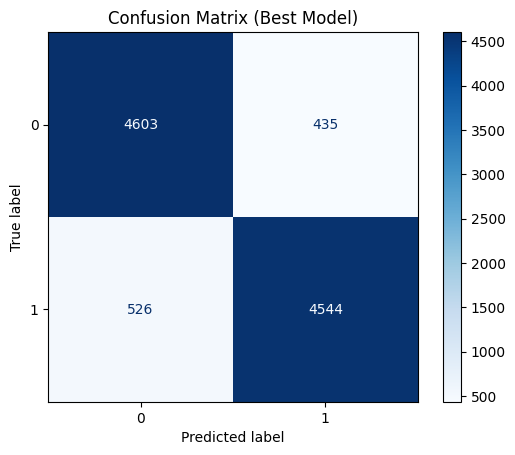

Classification Report (Best Model):
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      5038
           1       0.91      0.90      0.90      5070

    accuracy                           0.90     10108
   macro avg       0.91      0.90      0.90     10108
weighted avg       0.91      0.90      0.90     10108



In [59]:
# Plot the Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.named_steps['classifier'].classes_)

cmd.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Best Model)")
plt.show()

print("Classification Report (Best Model):")
print(classification_report(y_test, y_pred))

## Hyperparameter Tuning for MLP with Word2Vec using GridSearchCV

**1. Define the Parameter Grid**

In [ ]:
# Define the parameter grid for the MLPClassifier with Word2Vec
param_grid_mlp_word2vec = {
    'preprocessor__text__word2vec__vector_size': [100, 150],
    'preprocessor__text__word2vec__window': [3, 5, 7],
    'classifier__hidden_layer_sizes': [ (50, 50), (100, 50)],
    'classifier__alpha': [0.0001, 0.001, 0.01],
}

**2. Perform Grid Search with Cross-Validation:**

In [ ]:
# Create the GridSearchCV object
grid_search_mlp_word2vec = GridSearchCV(pipelinemlp, param_grid_mlp_word2vec, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search_mlp_word2vec.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search_mlp_word2vec.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search_mlp_word2vec.best_score_))

# Evaluate the best model on the test set
best_model_mlp_word2vec = grid_search_mlp_word2vec.best_estimator_
y_pred_mlp_word2vec = best_model_mlp_word2vec.predict(X_test)



**3. Evaluate the Best Model:**

In [ ]:
# Plot the Confusion Matrix

cm_mlp_word2vec = confusion_matrix(y_test, y_pred_mlp_word2vec)
cmd_mlp_word2vec = ConfusionMatrixDisplay(confusion_matrix=cm_mlp_word2vec, display_labels=best_model_mlp_word2vec.named_steps['classifier'].classes_)

cmd_mlp_word2vec.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Best MLP Model with Word2Vec)")
plt.show()

print("Classification Report (Best MLP Model with Word2Vec):")
print(classification_report(y_test, y_pred_mlp_word2vec))

## Saving Models

In [ ]:
joblib.dump(best_model_mlp_word2vec, 'best_mlp_word2vec_model.pkl')
joblib.dump(best_model, 'best_rf_model.pkl')